In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preprocessed_ML.csv', low_memory=False) 
print(df.shape)

(152232, 77)


In [3]:
df['Attack_type'].value_counts()

Normal                   24125
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9552
Port_Scanning             8924
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64

In [4]:
num_classes = df['Attack_type'].nunique()
print(num_classes)

15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152232 entries, 0 to 152231
Data columns (total 77 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Unnamed: 0                                                                         152232 non-null  int64  
 1   arp.opcode                                                                         152232 non-null  float64
 2   arp.hw.size                                                                        152232 non-null  float64
 3   icmp.checksum                                                                      152232 non-null  float64
 4   icmp.seq_le                                                                        152232 non-null  float64
 5   icmp.unused                                                                        152232 non

In [6]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['Unnamed: 0',
 'arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0.0',
 'http.request.method-0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-0.0',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2

In [7]:
len(feat_cols)

76

In [8]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [9]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [10]:
df[skip_list[3]].value_counts()

0.0    152232
Name: mqtt.msg_decoded_as, dtype: int64

In [11]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['Unnamed: 0',
 'arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0.0',
 'http.request.method-0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-0.0',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-127.0.0.1'

# Rest of visualization will be on test set
### because it takes much time on the whole dataset

In [12]:
X = df.drop([label_col], axis=1)
y = df[label_col]


In [13]:
print(y.shape)

(152232,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [15]:
print(X_train.shape)

(121785, 72)


In [16]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [17]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [18]:
print(y_train.shape)

(121785,)


In [19]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [20]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
#remove reshaping for randomforrest
# this is only needed for a 1D CNN
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
input_shape = X_train.shape[1:]
print(X_train.shape, X_test.shape)
print(input_shape)

(121785, 72) (30447, 72)
(72,)


In [21]:
num_classes = len(np.unique(y_train))
num_classes

from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=77, n_jobs=-1, random_state=7)
model.fit(X_train, y_train)
print ("model score ", model.score(X_test, y_test))

model score  0.999770092291523


In [24]:
print(y_train.shape)

(121785, 15)


# Validation Results

In [25]:
y_hat = model.predict(X_test)

In [26]:
print(y_hat.shape)

(30447, 15)


In [27]:
y_hat = np.argmax(y_hat, axis=0)
y_true = np.argmax(y_test, axis=0)

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

Accuracy:  1.0
Precision::  1.0
Recall::  1.0
F1_Score::  1.0

Macro precision_recall_fscore_support (macro) average
(1.0, 1.0, 1.0, None)

Macro precision_recall_fscore_support (micro) average
(1.0, 1.0, 1.0, None)

Macro precision_recall_fscore_support (weighted) average
(1.0, 1.0, 1.0, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00         1
            DDoS_HTTP       1.00      1.00      1.00         1
            DDoS_ICMP       1.00      1.00      1.00         1
             DDoS_TCP       1.00      1.00      1.00         1
             DDoS_UDP       1.00      1.00      1.00         1
       Fingerprinting       1.00      1.00      1.00         1
                 MITM       1.00      1.00      1.00         1
               Normal       1.00      1.00      1.00         1
             Password       1.00      1.00      1.00         1
        Port_Scanning       1.00

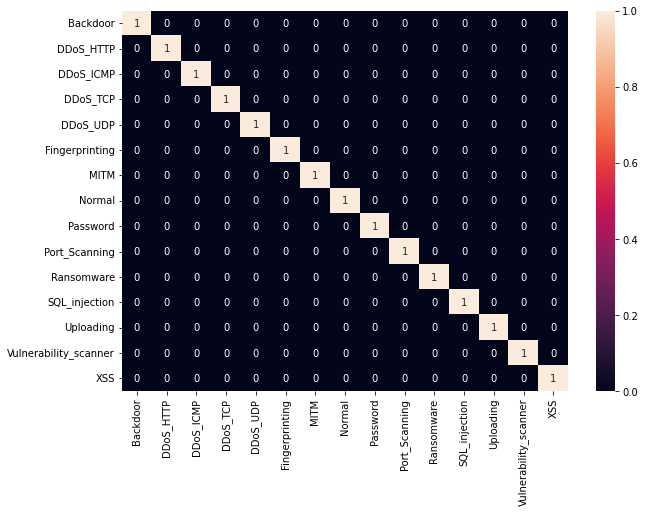

In [32]:
print_score(y_hat, y_true, label_encoder)